### Pradeep Mundlik (AI21BTECH11022)
### Assignment-1 
#### Problem-1

In [76]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Creating Dataset from two gaussian distros
def create_data(gamma):
    d1=torch.normal(1.0,1.0,size=[500,2]) 
    d2=torch.normal(4.0+gamma,1.0,size=[500,2]) 
    X=torch.empty(1000,3)
    X[::2,:2] = d1
    X[1::2,:2] = d2
    X[:,2] = 1
    # Creating labels
    Y = torch.empty(1000,1)
    Y[::2]=1
    Y[1::2]=-1
    return X,Y

In [78]:
## level of separability as distance between two mean points
gamma = [1.0,2.0,3.0,4.0,5.0]

#### Training using Perceptron Learning Algorithm

In [79]:
def train(X,Y):
    max_iter = 100 # Maximum number of iterations allowed
    iter=0 # number of iterations require to converge
    W = torch.zeros(X.size(1))
    while(iter<max_iter):
        flag=0 #shows that how many points are not classified correctly yet
        iter = iter+1
        for i in range(X.size(0)):
            if(Y[i]*(X[i].dot(W))<=0):
                W = W + Y[i]*X[i]
                flag = flag+1 # marking that there are some points which are missclassified yet
        # check if all points are classified correctly or not
        if(flag==0):
            print("All points are classified....")
            break
        
    if(iter==max_iter):
        print("Maximum iterations limit reached....")
    else:
        print("Number of iterations required:",iter)
    return W


For Gamma = 1.0
All points are classified....
Number of iterations required: 4


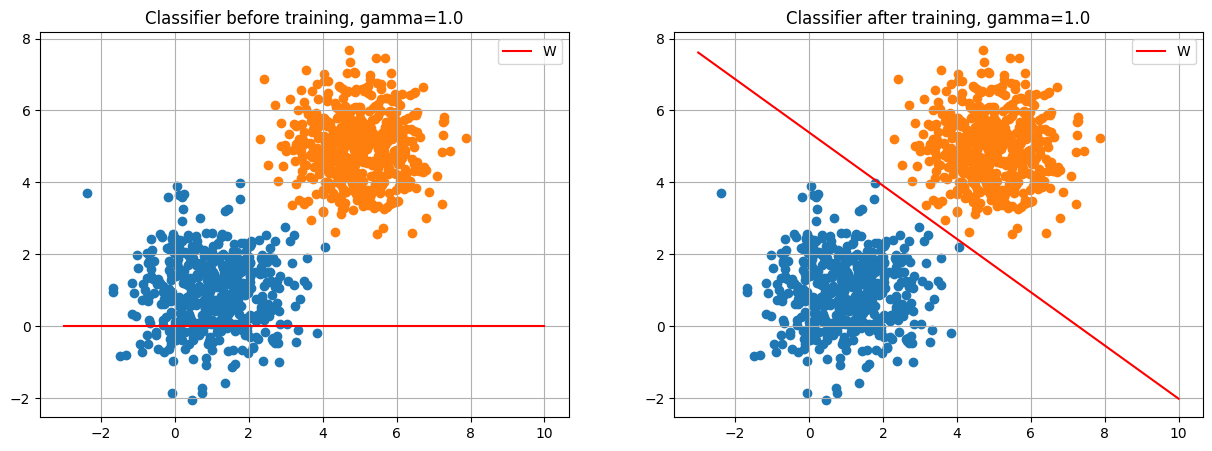


For Gamma = 2.0
All points are classified....
Number of iterations required: 3


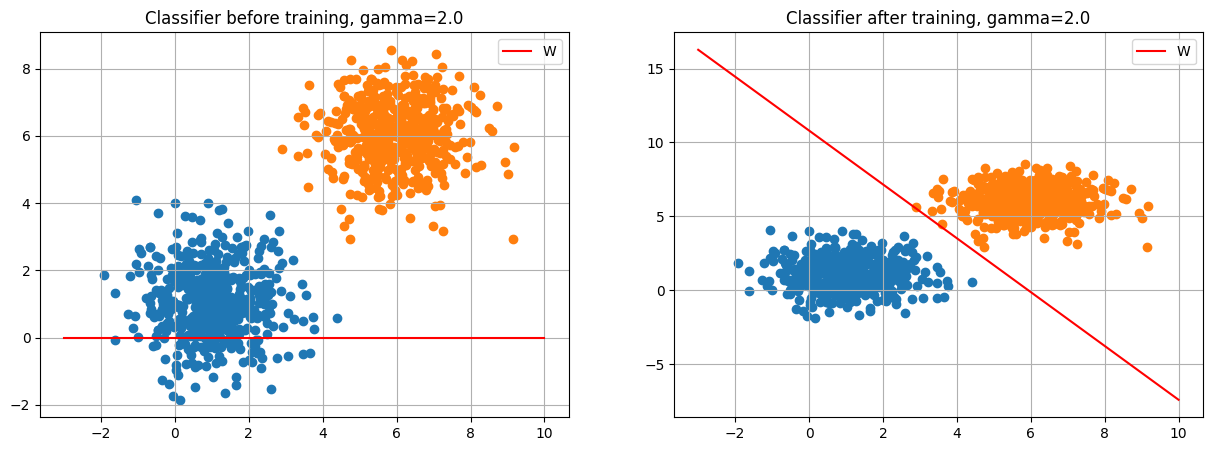


For Gamma = 3.0
All points are classified....
Number of iterations required: 3


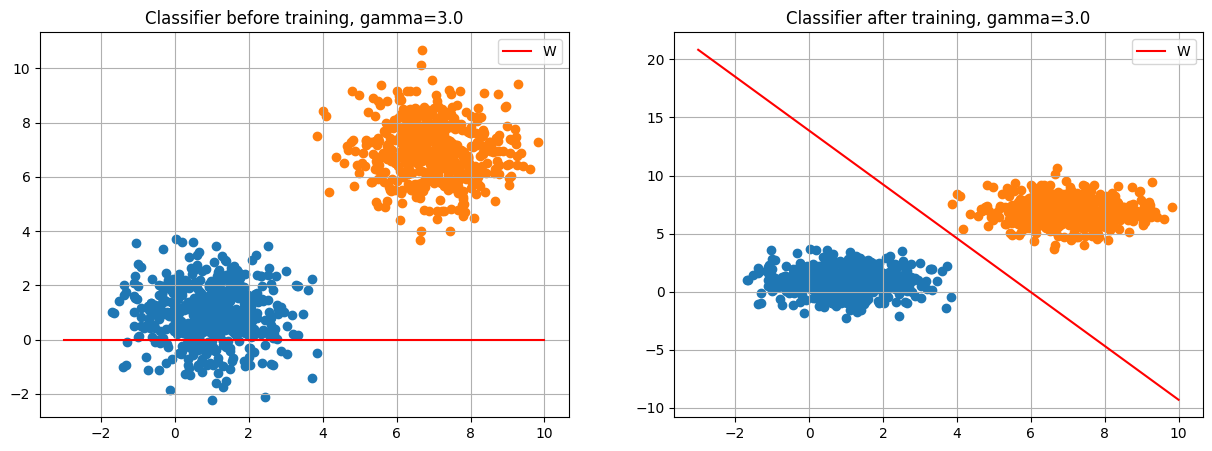


For Gamma = 4.0
All points are classified....
Number of iterations required: 3


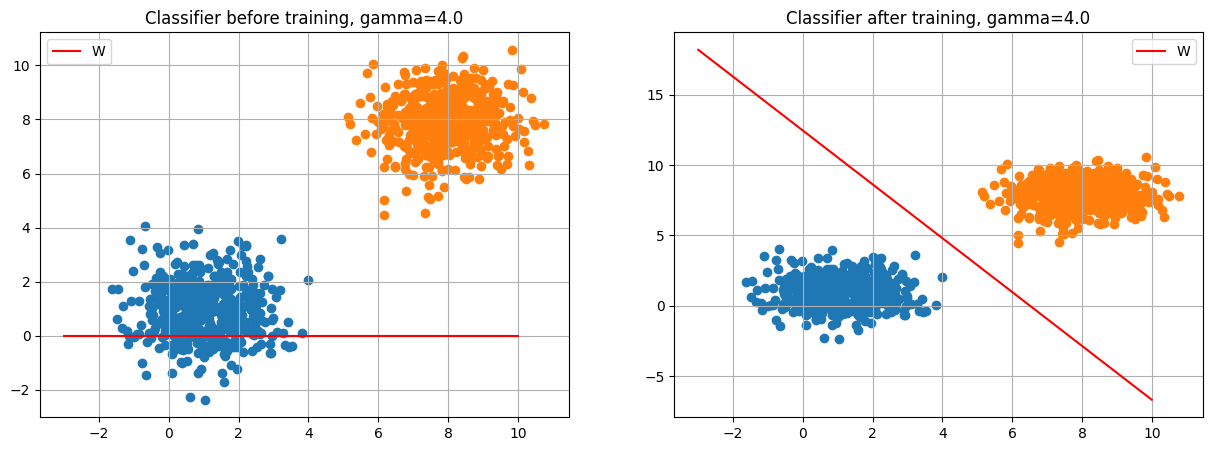


For Gamma = 5.0
All points are classified....
Number of iterations required: 2


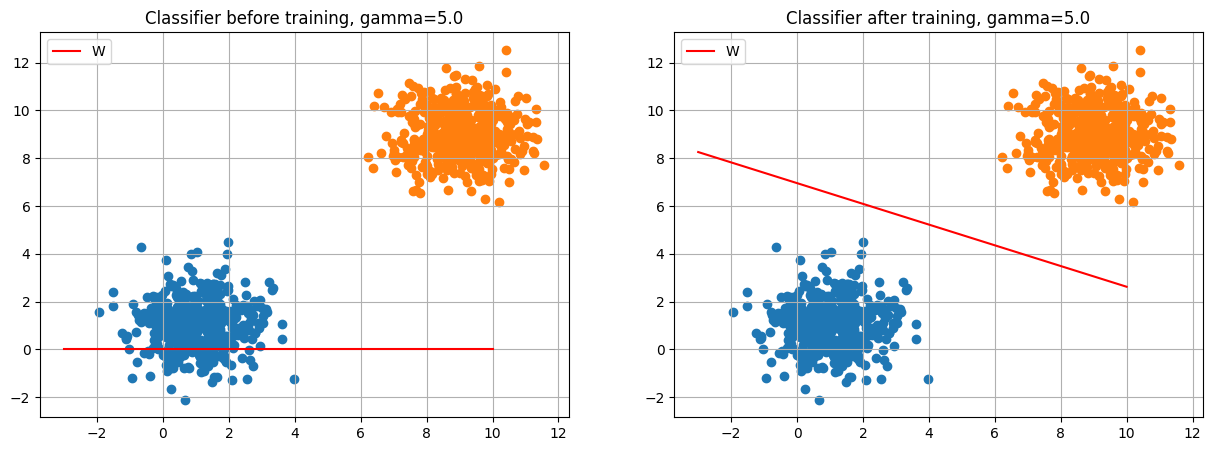

In [80]:
for g in gamma:
    X,Y = create_data(g)
    print(f"\nFor Gamma = {g}")

    ## Plot before training
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    plt.scatter(X[::2,0],X[::2,1])
    plt.scatter(X[1::2,0],X[1::2,1])
    plt.plot(np.linspace(-3.0,10.0,100),np.zeros(100),'r',label='W')
    plt.title(f"Classifier before training, gamma={g}")
    plt.legend()
    plt.grid()

    ## training model
    W = train(X,Y)

    ## plot after training
    x = np.linspace(-3.0,10.0,100)
    slope = -W[0].item()/W[1].item()
    c = -W[2].item()/W[1].item()
    y = slope*x + c
    plt.subplot(1,2,2)
    plt.plot(x,y,'r',label='W')
    plt.scatter(X[::2,0],X[::2,1])
    plt.scatter(X[1::2,0],X[1::2,1])
    plt.title(f"Classifier after training, gamma={g}")
    plt.legend()
    plt.grid()
    plt.show()

**Conclusion:** <p>We can see that as we are increasing level of separability, number of iterations required to converge are decreasing. 
As datasets are becoming more and more farther, it becomes computationally easier to classify them perfectly.</p>